In [210]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

from tqdm import tqdm

In [139]:
ds_cfd = xr.open_dataset("../era5/era5-nordics-ecacfd.nc")
ds_fd = xr.open_dataset("../era5/era5-nordics-ecafd.nc")
ds_csu = xr.open_dataset("../era5/era5-nordics-ecacsu.nc")
ds_id = xr.open_dataset("../era5/era5-nordics-ecaid.nc")
ds_su = xr.open_dataset("../era5/era5-nordics-ecasu.nc")

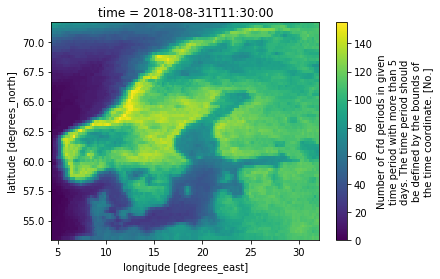

In [140]:
ds_cfd.number_of_cfd_periods_with_more_than_5days_per_time_period.plot()

In [141]:
lons, lats = np.meshgrid(ds_ecacfd.longitude, ds_ecacfd.latitude)

In [142]:
lons

array([[ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       ...,
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ]], dtype=float32)

In [143]:
psr = xr.open_dataset("pine_spruce.nc")

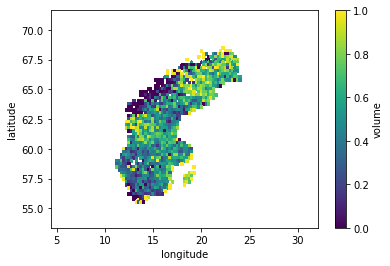

In [144]:
psr.volume.plot()

In [145]:
df = pd.DataFrame()

In [146]:
data = {
    "ratio": psr.volume.values.ravel()
}

In [147]:
data.keys()

dict_keys(['ratio'])

In [148]:
data["cfd"] = ds_cfd.number_of_cfd_periods_with_more_than_5days_per_time_period.values.ravel()

In [149]:
data["fd"] = ds_fd.frost_days_index_per_time_period.values.ravel()

In [150]:
data["csu"] = ds_csu.number_of_csu_periods_with_more_than_5days_per_time_period.values.ravel()

In [151]:
data["id"] = ds_id.ice_days_index_per_time_period.values.ravel()

In [152]:
data["su"] = ds_su.summer_days_index_per_time_period.values.ravel()

In [153]:
df = pd.DataFrame(data)

In [154]:
df

,ratio,cfd,fd,csu,id,su
0,NaN,89.0,1562.0,0.0,576.0,0.0
1,NaN,86.0,1536.0,0.0,570.0,0.0
2,NaN,83.0,1525.0,0.0,558.0,0.0
3,NaN,84.0,1504.0,0.0,551.0,0.0
4,NaN,78.0,1481.0,0.0,549.0,0.0
5,NaN,80.0,1478.0,0.0,540.0,0.0
6,NaN,79.0,1460.0,0.0,533.0,0.0
7,NaN,77.0,1443.0,0.0,526.0,0.0
8,NaN,75.0,1437.0,0.0,514.0,0.0
9,NaN,77.0,1428.0,0.0,505.0,0.0


In [155]:
df1 = df.dropna(inplace=False)

In [156]:
df1 = df[df["ratio"] > 0]

In [157]:
df1.columns[1:]

Index(['cfd', 'fd', 'csu', 'id', 'su'], dtype='object')

In [158]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(df1[df1.columns[1:]], df1["ratio"])

In [160]:
X_train

,cfd,fd,csu,id,su
4487,140.0,3088.0,90.0,1302.0,2093.0
5263,115.0,2435.0,84.0,957.0,2427.0
5918,102.0,2119.0,88.0,727.0,2401.0
1622,81.0,4033.0,55.0,2609.0,1066.0
4040,129.0,3405.0,82.0,1565.0,1723.0
5031,130.0,2905.0,100.0,1239.0,2091.0
3480,126.0,3498.0,64.0,1767.0,1297.0
2279,106.0,3871.0,62.0,2339.0,1208.0
2511,116.0,3603.0,72.0,2035.0,1742.0
3476,128.0,3395.0,42.0,1856.0,952.0


In [161]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [162]:
y_pred = rf.predict(X_test)

In [163]:
mean_squared_error(y_test, y_pred)

0.053534454458138855

In [164]:
r2_score(y_test, y_pred)

0.18386398634449286

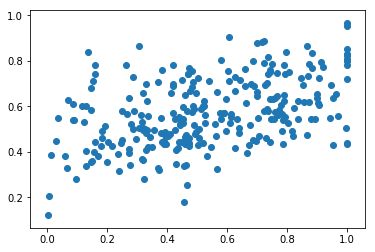

In [165]:
plt.scatter(y_test, y_pred)

In [166]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [167]:
df_results

,observed,predicted
3050,0.673829,0.430189
5275,0.502411,0.427731
6485,0.319153,0.503242
2946,0.685912,0.799643
5362,0.397295,0.432455
4370,0.698629,0.661149
2950,0.419085,0.686689
2074,0.485015,0.756363
4600,0.641203,0.482933
2838,0.795129,0.840271


In [225]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [226]:
feature_importances

,importance
su,0.245990
fd,0.213061
id,0.183382
cfd,0.183289
csu,0.174278


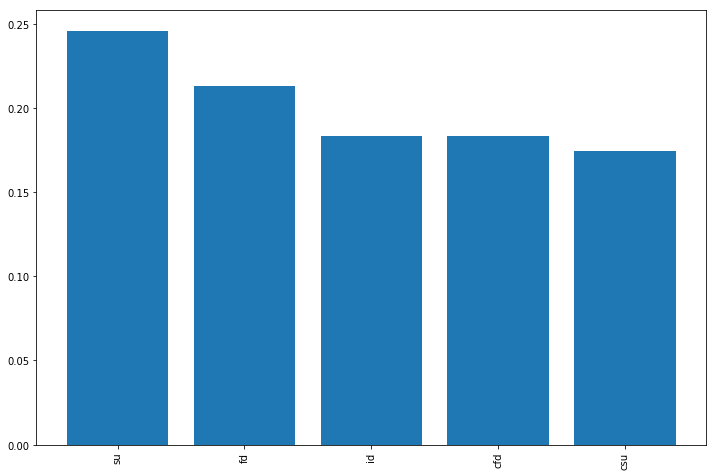

In [170]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()

# Spruce - Classifier

In [232]:
ds_spruce = xr.open_dataset("spruce.nc")

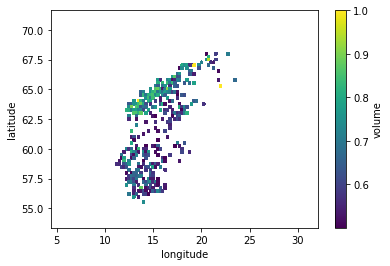

In [233]:
ds_spruce.volume.where(ds_spruce.volume > 0.5).plot()

In [266]:
df2 = df.copy()
df2["ratio"] = ds_spruce.volume.where(ds_spruce.volume > 0.5).values.ravel()
df2["predominant"] = df2.apply(lambda r: 0 if np.isnan(r["ratio"]) else 1, axis=1)
df2.head()

,ratio,cfd,fd,csu,id,su,predominant
0,NaN,89.0,1562.0,0.0,576.0,0.0,0
1,NaN,86.0,1536.0,0.0,570.0,0.0,0
2,NaN,83.0,1525.0,0.0,558.0,0.0,0
3,NaN,84.0,1504.0,0.0,551.0,0.0,0
4,NaN,78.0,1481.0,0.0,549.0,0.0,0


In [250]:
X = df2[df2.columns[1:5]]
y = df2["predominant"]

In [251]:
rus = RandomUnderSampler(random_state=1234)

In [252]:
rus.fit(X, y)

RandomUnderSampler(random_state=1234, ratio=None, replacement=False,
          return_indices=False, sampling_strategy='auto')

In [253]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [255]:
rf2 = RandomForestClassifier(n_estimators=500, max_depth=15)

In [256]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [257]:
y_pred = rf2.predict(X_test)

In [258]:
accuracy_score(y_pred, y_test)

0.861878453038674

In [263]:
confusion_matrix(y_pred, y_test)

array([[79, 11],
       [14, 77]])

In [260]:
feature_importances = pd.DataFrame(rf2.feature_importances_,
                                   index = df2.columns[1:5],
                                   columns=['importance']).sort_values('importance', ascending=False)

In [261]:
feature_importances

,importance
fd,0.291215
cfd,0.242938
csu,0.241151
id,0.224696


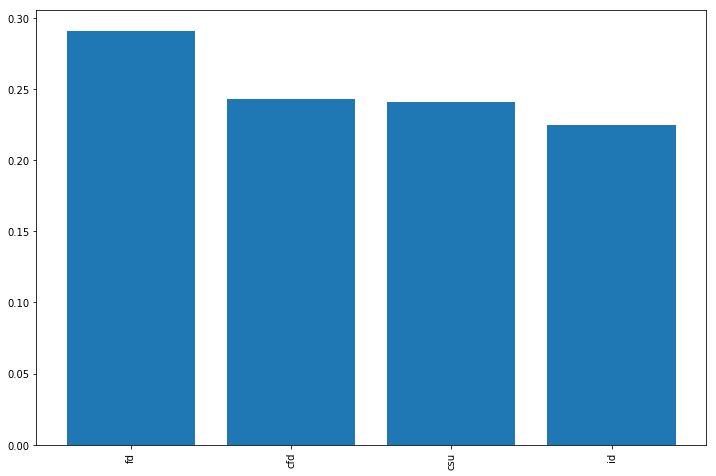

In [262]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()

# Pine - Classifier

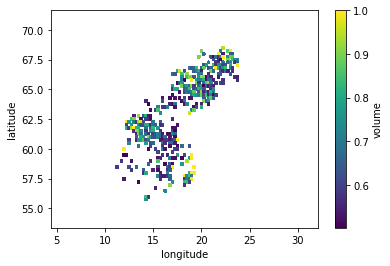

In [277]:
ds_pine = xr.open_dataset("pine.nc")
ds_pine.volume.where(ds_pine.volume > 0.5).plot()

In [278]:
df3 = df.copy()
df3["ratio"] = ds_pine.volume.where(ds_spruce.volume > 0.5).values.ravel()
df3["predominant"] = df3.apply(lambda r: 0 if np.isnan(r["ratio"]) else 1, axis=1)
df3.head()

,ratio,cfd,fd,csu,id,su,predominant
0,NaN,89.0,1562.0,0.0,576.0,0.0,0
1,NaN,86.0,1536.0,0.0,570.0,0.0,0
2,NaN,83.0,1525.0,0.0,558.0,0.0,0
3,NaN,84.0,1504.0,0.0,551.0,0.0,0
4,NaN,78.0,1481.0,0.0,549.0,0.0,0


In [279]:
X = df3[df3.columns[1:5]]
y = df3["predominant"]

In [280]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [282]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [283]:
y_pred = rf2.predict(X_test)

In [284]:
accuracy_score(y_pred, y_test)

0.8342541436464088

In [285]:
confusion_matrix(y_pred, y_test)

array([[74, 15],
       [15, 77]])